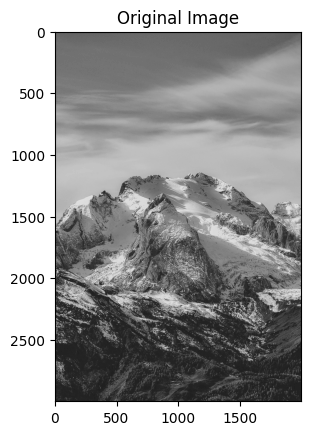

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io
from skimage.color import rgb2gray

image = io.imread("/content/drive/MyDrive/Colab Notebooks/CSE_303/Datasets/pexels-eberhardgross-1366919.jpg")
image = rgb2gray(image)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()


In [40]:

X = image.reshape(-1, image.shape[1])  # Flatten the image to 2D matrix

def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)  # Reduce dimensions
    X_reconstructed = pca.inverse_transform(X_pca)  # Reconstruct the image
    return X_reconstructed

# Test PCA with different numbers of components
n_components_list = [5, 20, 50, 100]
components = [apply_pca(X, n) for n in n_components_list]

components = [img.reshape(image.shape) for img in components]

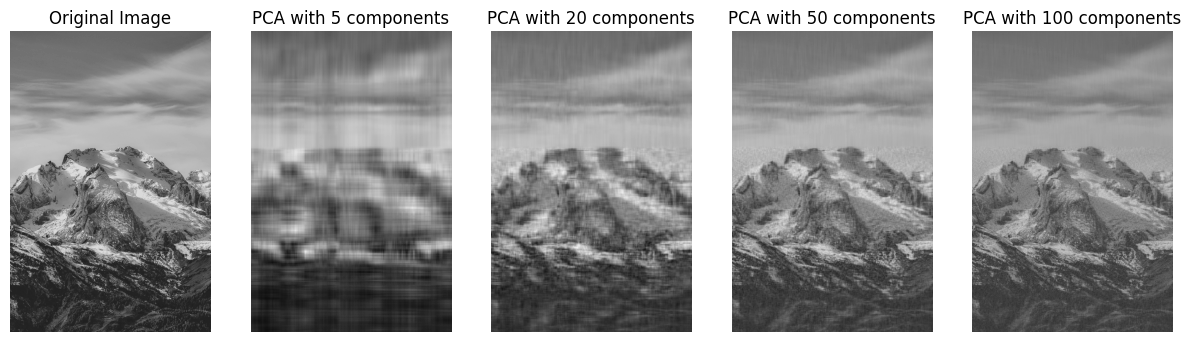

In [41]:
fig, axes = plt.subplots(1, len(n_components_list) + 1, figsize=(15, 5))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

for i, n in enumerate(n_components_list):
    axes[i + 1].imshow(components[i], cmap='gray')
    axes[i + 1].set_title(f"PCA with {n} components")
    axes[i + 1].axis('off')

plt.show()